In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Using raw string
data = pd.read_csv(r"C:\Users\babar\Downloads\honeyproduction 1998-2021.csv")


In [2]:
print(data.head())

        State    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0     Alabama   16000.0           71   1136000.0    159000.0        0.72   
1     Arizona   55000.0           60   3300000.0   1485000.0        0.64   
2    Arkansas   53000.0           65   3445000.0   1688000.0        0.59   
3  California  450000.0           83  37350000.0  12326000.0        0.62   
4    Colorado   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


In [3]:
# Check for missing values and basic statistics
print(data.isnull().sum())
print(data.describe())

State          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64
              numcol  yieldpercol     totalprod        stocks  priceperlb  \
count     985.000000   985.000000  9.850000e+02  9.850000e+02  985.000000   
mean    62892.385787    58.402030  4.035132e+06  1.167187e+06    1.969594   
std     94163.791917    19.291695  6.752290e+06  2.088589e+06    1.177922   
min      2000.000000     3.000000  8.400000e+04  8.000000e+03    0.490000   
25%      9000.000000    45.000000  4.690000e+05  1.080000e+05    1.200000   
50%     26000.000000    55.000000  1.488000e+06  3.600000e+05    1.700000   
75%     68000.000000    70.000000  3.780000e+06  1.217000e+06    2.360000   
max    530000.000000   136.000000  4.641000e+07  1.380000e+07    8.230000   

          prodvalue         year  
count  9.850000e+02   985.000000  
mean   5.939911e+06  2009.291371  
std    9.806595e+06     6.962251  
min    1.620000e+

**Q1) How has honey production yield changed from 1998 to 2021?**

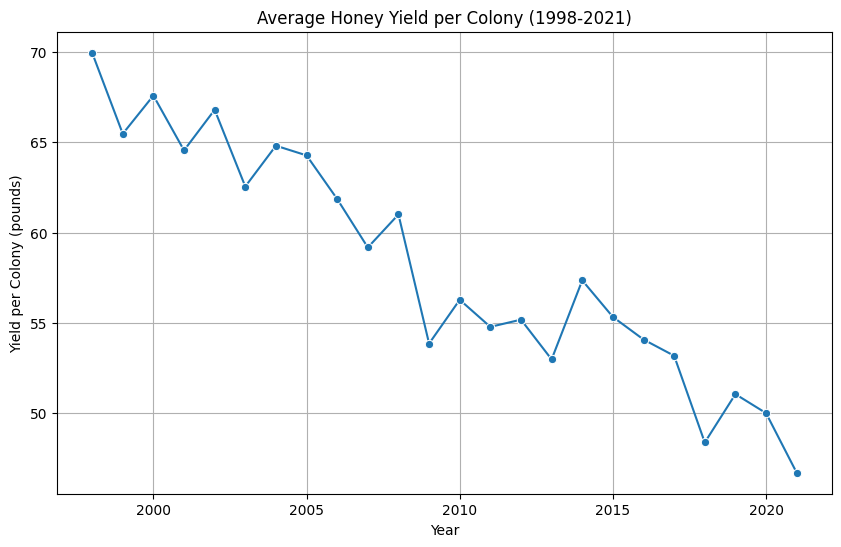

In [6]:
yield_per_year = data.groupby('year')['yieldpercol'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='yieldpercol', data=yield_per_year, marker='o')
plt.title('Average Honey Yield per Colony (1998-2021)')
plt.xlabel('Year')
plt.ylabel('Yield per Colony (pounds)')
plt.grid(True)
plt.show()

In [17]:
data.columns

Index(['State', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

**Q2) Over time, what are the major production trends across the states?**

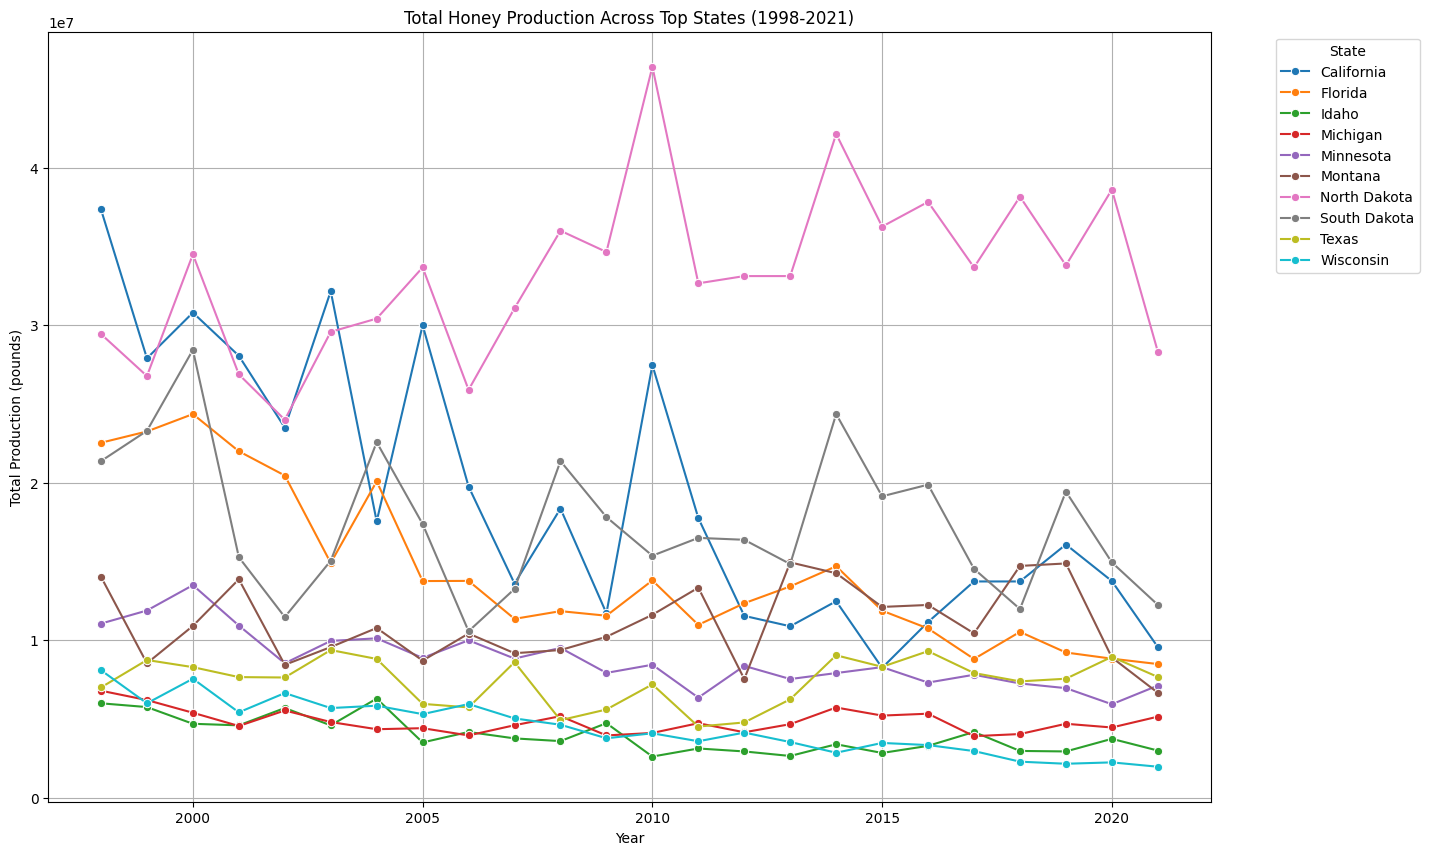

In [18]:
if 'totalprod' in data.columns:
    # Sum total production by state and year
    total_production_by_state = data.groupby(['year', 'State'])['totalprod'].sum().reset_index()

    # Identify top 10 states with the highest total production overall
    top_states = total_production_by_state.groupby('State')['totalprod'].sum().nlargest(10).index

    # Filter data to include only the top states
    filtered_data = total_production_by_state[total_production_by_state['State'].isin(top_states)]

    plt.figure(figsize=(15, 10))
    sns.lineplot(data=filtered_data, x='year', y='totalprod', hue='State', marker='o')
    plt.title('Total Honey Production Across Top States (1998-2021)')
    plt.xlabel('Year')
    plt.ylabel('Total Production (pounds)')
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()
else:
    print("Column 'totalprod' not found in the dataset.")

**Q3) Does the data show any trends in terms of the number of honey-producing colonies and yield per colony before 2006?**

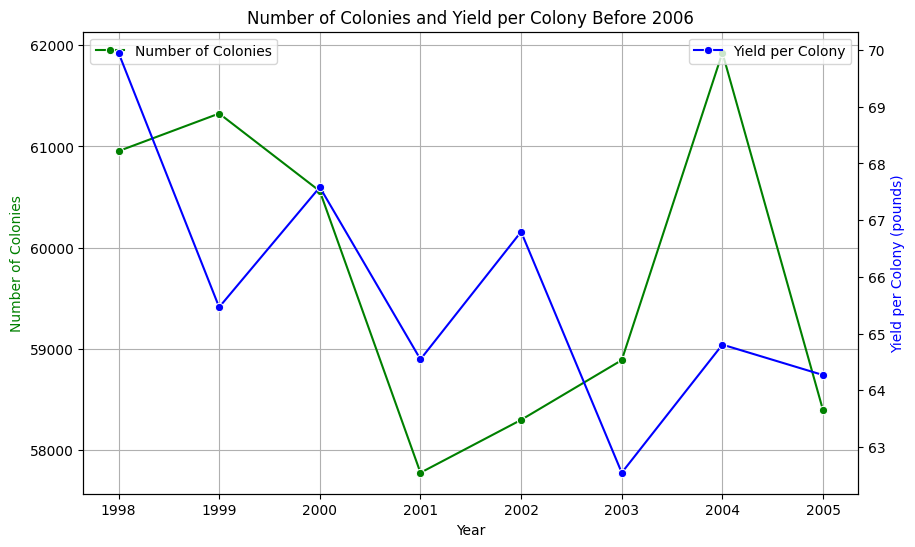

In [20]:
pre_2006_data = data[data['year'] < 2006]
pre_2006_summary = pre_2006_data.groupby('year').agg({'numcol': 'mean', 'yieldpercol': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
sns.lineplot(x='year', y='numcol', data=pre_2006_summary, ax=ax1, color='g', marker='o', label='Number of Colonies')
sns.lineplot(x='year', y='yieldpercol', data=pre_2006_summary, ax=ax2, color='b', marker='o', label='Yield per Colony')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Colonies', color='g')
ax2.set_ylabel('Yield per Colony (pounds)', color='b')
plt.title('Number of Colonies and Yield per Colony Before 2006')
ax1.grid(True)
plt.show()

**Q4) Are there any patterns that can be observed between total honey production and the value of production every year?**

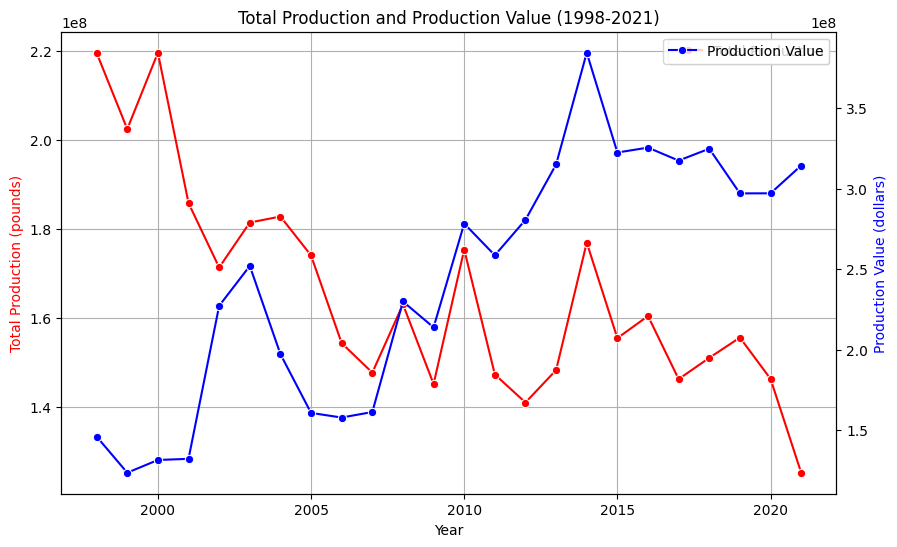

In [13]:
production_value = data.groupby('year').agg({'totalprod': 'sum', 'prodvalue': 'sum'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
sns.lineplot(x='year', y='totalprod', data=production_value, ax=ax1, color='r', marker='o', label='Total Production')
sns.lineplot(x='year', y='prodvalue', data=production_value, ax=ax2, color='b', marker='o', label='Production Value')

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Production (pounds)', color='r')
ax2.set_ylabel('Production Value (dollars)', color='b')
plt.title('Total Production and Production Value (1998-2021)')
ax1.grid(True)
plt.show()

**Q5) How has the value of production, which in some sense could be tied to demand, changed every year?**

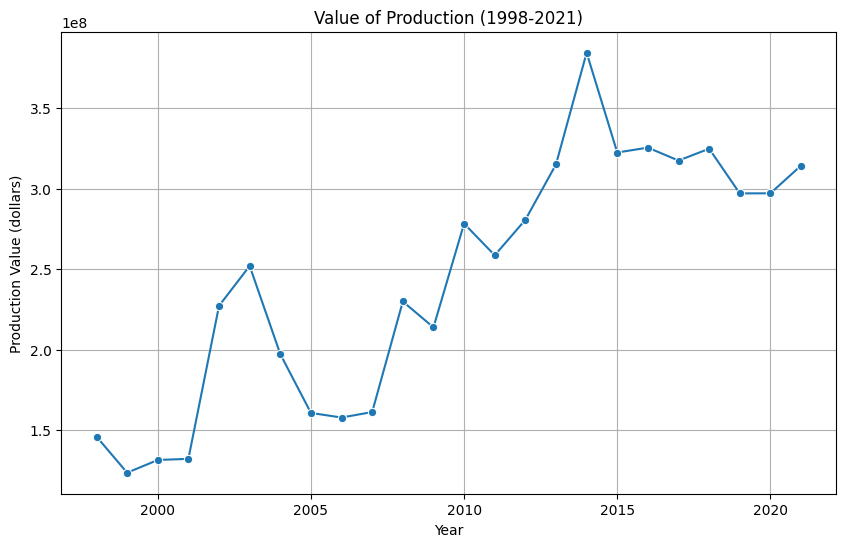

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='prodvalue', data=production_value, marker='o')
plt.title('Value of Production (1998-2021)')
plt.xlabel('Year')
plt.ylabel('Production Value (dollars)')
plt.grid(True)
plt.show()

**Q6) Custom plots and insights**

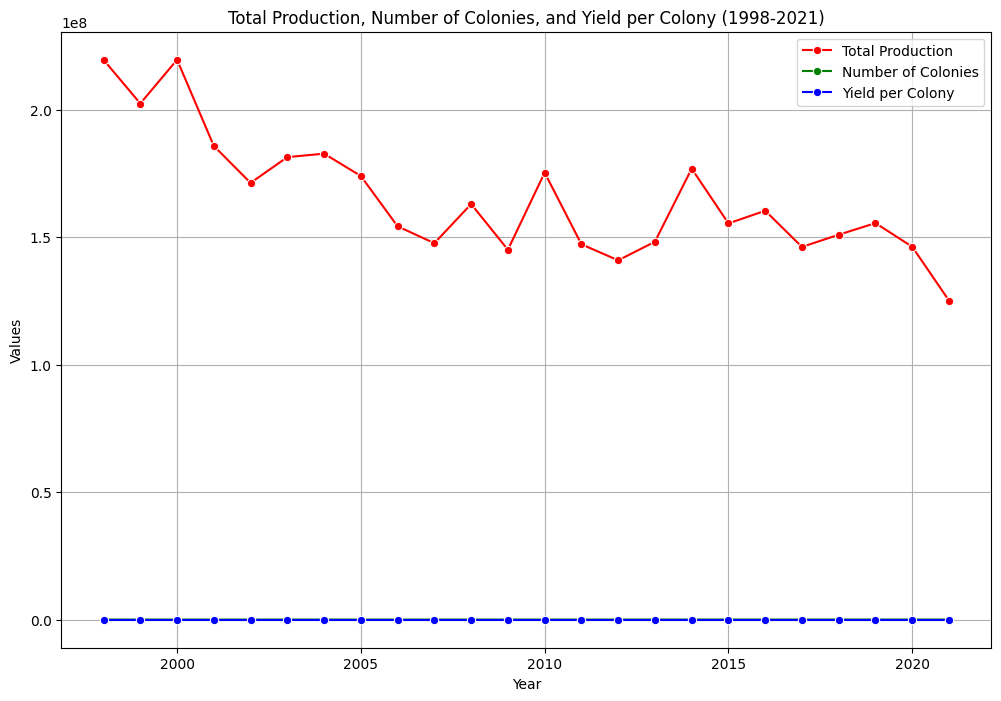

In [15]:
fig, ax1 = plt.subplots(figsize=(12, 8))

sns.lineplot(x='year', y='totalprod', data=production_value, ax=ax1, color='r', marker='o', label='Total Production')
sns.lineplot(x='year', y='numcol', data=data.groupby('year')['numcol'].mean().reset_index(), ax=ax1, color='g', marker='o', label='Number of Colonies')
sns.lineplot(x='year', y='yieldpercol', data=yield_per_year, ax=ax1, color='b', marker='o', label='Yield per Colony')

ax1.set_xlabel('Year')
ax1.set_ylabel('Values')
plt.title('Total Production, Number of Colonies, and Yield per Colony (1998-2021)')
plt.legend()
ax1.grid(True)
plt.show()